# Bike Sharing


### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

## Team Members
- Prithvi Kumar Panchapakeshan

## Estimate of number of bikes hired on a given day

## Project Definition

### Goals

Describe the goal of this project.

Example:
The goal of this project is to estimate the number of bikes on any given day taking into consideration other factors like
temperature, whether its a working day, etc.


### Dataset

Briefly describe the source(s) of data you are using.
- Provide the URL to the data source.
- If you are providing your own data set, include the data with your project submission.
- You can find sample datasets from:
  - http://archive.ics.uci.edu/ml/datasets.html
  - http://data.gov.sg/

Example:

We will use the dataset from: https://data.gov.sg/dataset/coe-bidding-results

#### Format: CSV

#### Columns:
 
|Name|Type|Unit of Measure|Description|
|--|--|--|--|
|instant|Numeric|none|index number|
|dteday|Datetime, dd/MM/YYYY|none|date range: Jan 1, 2011 to Mar 31, 2012|
|season|Numeric|none|type of season|
|yr|Numeric|none|0-2011:1-2012
|mnth|Numeric|none|Month number 1-Jan,12-Dec|
|holiday|Numeric|none|0-No Holiday,1-Holiday|
|weekday|Numeric|none|0-Sunday,6-Saturday|
|workingday|Numeric|none|1-working day,0-not a working day|
|weathersit|Numeric|none|weather type|
|temp|Double|--|temperature|
|atemp|Double|--|--|
|hum|Double|--|humidity|
|windspeed|Double|--|windspeed|
|casual|Numeric|none|number of casual riders who rented bike|
|registered|Numeric|none|number of registered users who rented|
|cnt|Numeric|none|total number of rentals|

### Tasks
 
1. Process the dataset and identify the features which have good correlation with the number of bikes hired.
2. Shuffle and split into train and test sets. Use separate train and test sets to predict casual users and registered users.
3. Train a clustering algorithm, using Linear regression and SGD.
4. Compute the metrics for the algorithm.
5. Perform analysis for possible improvements.

## Section 3: Prepare Dataset

Write your code below to prepare the dataset using pandas

In [246]:
df = pd.read_csv("C:\\courses\\data\\bike-sharing\\day.csv", parse_dates=True, encoding='latin-1')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/1/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/1/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/1/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/1/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [247]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,361.500000,2.494460,0.504155,6.502770,0.027701,3.000000,0.685596,1.396122,0.495432,0.474357,0.628056,0.190473,847.903047,3667.427978,4515.331025
std,208.567735,1.111332,0.500329,3.449355,0.164228,2.004157,0.464600,0.545705,0.182820,0.162845,0.143054,0.077617,687.879262,1561.772202,1940.771293
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,181.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338125,0.338045,0.519375,0.134951,315.250000,2502.250000,3146.500000
50%,361.500000,2.000000,1.000000,6.500000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,711.500000,3676.500000,4558.000000
75%,541.750000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655000,0.607975,0.731042,0.233207,1094.750000,4805.500000,5990.500000
max,722.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [248]:
df.index = df['instant']
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2/1/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,3/1/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,4/1/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,5/1/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Use Scatter Matrix to determine which feature is closely correlated

 Scatter Matrix Plot

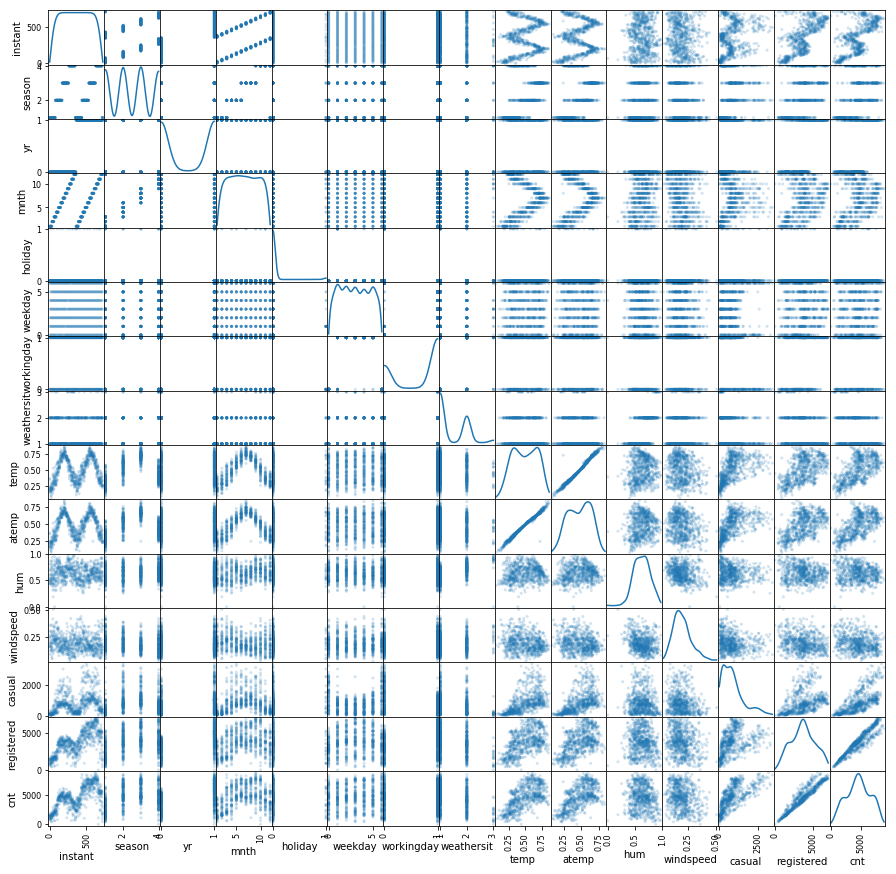

In [249]:
from pandas.plotting import scatter_matrix
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [250]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Columns chosen for predicting casual users and registered users

In [251]:
#casual_columns=['season',
#       'workingday', 'temp', 'atemp', 'hum', 'windspeed']
casual_columns=['workingday', 'temp', 'hum', 'windspeed']
print(casual_columns)
regd_columns=['mnth',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed','casual']
print(regd_columns)

['workingday', 'temp', 'hum', 'windspeed']
['mnth', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual']


In [252]:
pca = PCA(n_components=2)
X = df.loc[:,casual_columns]
X_2d = pca.fit_transform(X)

print(X.shape)
print(df.describe())

X_2d.shape
print(X.columns)

y_casual = df.casual
#y_casual = df.casual
y_regd = df.registered

(722, 4)
          instant      season          yr        mnth     holiday     weekday  \
count  722.000000  722.000000  722.000000  722.000000  722.000000  722.000000   
mean   361.500000    2.494460    0.504155    6.502770    0.027701    3.000000   
std    208.567735    1.111332    0.500329    3.449355    0.164228    2.004157   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    181.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    361.500000    2.000000    1.000000    6.500000    0.000000    3.000000   
75%    541.750000    3.000000    1.000000    9.750000    0.000000    5.000000   
max    722.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  722.000000  722.000000  722.000000  722.000000  722.000000  722.000000   
mean     0.685596    1.396122    0.495432    0.474357    0.628056    0.190473   
std      0.464600 

#### PCA

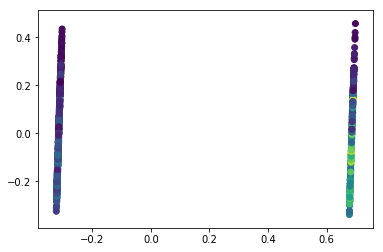

In [253]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_casual)
plt.show()

## Section 4: Select Features

Write your code below to create X_train, X_test, y_train, y_test

In [254]:
X_train, X_test, y_train_casual, y_test_casual = train_test_split(X, y_casual,random_state=42)

In [255]:
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_scaled_train = scaler_X.transform(X_train)
X_scaled_test = scaler_X.transform(X_test)
print(X_scaled_train.shape)
print(X_scaled_test.shape)

# 2. scale both y series
scaler_y = StandardScaler()
scaler_y.fit(y_train_casual.values.reshape(-1, 1))
#y_scaled_train = scaler_y.transform(y_train.values.reshape(-1, 1))
#y_scaled_test = scaler_y.transform(y_test.values.reshape(-1, 1))

#Without scaling Y
y_scaled_casual_train =  scaler_y.transform(y_train_casual.values.reshape(-1, 1))
y_scaled_casual_test = scaler_y.transform(y_test_casual.values.reshape(-1, 1))
y_scaled_casual_train[0]
print(y_scaled_casual_train.shape)
print(y_scaled_casual_test.shape)

(541, 4)
(181, 4)
(541, 1)
(181, 1)


C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Training and splitting data set for registered users

In [256]:
X_regd = df.loc[:,regd_columns]

In [257]:
X_train_regd, X_test_regd, y_train_regd, y_test_regd = train_test_split(X_regd, y_regd,random_state=42)

In [258]:
scaler_X_regd = StandardScaler()
scaler_X_regd.fit(X_train_regd)
X_scaled_train_regd = scaler_X_regd.transform(X_train_regd)
X_scaled_test_regd = scaler_X_regd.transform(X_test_regd)
print(X_scaled_train_regd.shape)
print(X_scaled_test_regd.shape)

#Without scaling Y
#scaler_y.fit(y_train.values.reshape(-1, 1))
#print(y_train.values.reshape(-1,1).shape)
scaler_y_regd = StandardScaler()
scaler_y_regd.fit(y_train_regd.values.reshape(-1, 1))
y_scaled_regd_train = scaler_y_regd.transform(y_train_regd.values.reshape(-1, 1))
y_scaled_regd_test = scaler_y_regd.transform(y_test_regd.values.reshape(-1, 1))
y_scaled_regd_train[0]
print(y_scaled_regd_train.shape)
print(y_scaled_regd_test.shape)

(541, 7)
(181, 7)
(541, 1)
(181, 1)


C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Section 5: Train the algorithm(s)

Write your code below to initialize and train the algorithm(s)

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin = LinearRegression()
lin.fit(X_scaled_train, y_scaled_casual_train)

pred_scaled = lin.predict(X_scaled_test)

print('MSE', mean_squared_error(y_scaled_casual_test, pred_scaled))
print('R2', r2_score(y_scaled_casual_test, pred_scaled))

MSE 0.33546753032511395
R2 0.6447445254000055


In [260]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd.fit(X_scaled_train, y_scaled_casual_train) # ravel converts 2-D array to 1-D vector

pred_scaled_sgd = sgd.predict(X_scaled_test)

print('MSE', mean_squared_error(y_scaled_casual_test, pred_scaled_sgd))
print('R2', r2_score(y_scaled_casual_test, pred_scaled_sgd))

-- Epoch 1
Norm: 0.61, NNZs: 4, Bias: 0.003112, T: 541, Avg. loss: 0.285319
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.74, NNZs: 4, Bias: 0.000836, T: 1082, Avg. loss: 0.201146
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 4, Bias: -0.003442, T: 1623, Avg. loss: 0.192963
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.80, NNZs: 4, Bias: -0.005335, T: 2164, Avg. loss: 0.191797
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 4, Bias: -0.002214, T: 2705, Avg. loss: 0.191396
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 4, Bias: 0.002103, T: 3246, Avg. loss: 0.191229
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 4, Bias: 0.002003, T: 3787, Avg. loss: 0.191140
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
MSE 0.33584109607487694
R2 0.6443489244379756


C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting for registered users

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_regd = LinearRegression()
lin_regd.fit(X_scaled_train_regd, y_scaled_regd_train)

pred_scaled_regd = lin_regd.predict(X_scaled_test_regd)

print('MSE', mean_squared_error(y_scaled_regd_test, pred_scaled_regd))
print('R2', r2_score(y_scaled_regd_test, pred_scaled_regd))

MSE 0.39139711755975815
R2 0.5684800274792227


In [262]:
from sklearn.linear_model import SGDRegressor

sgd_regd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd_regd.fit(X_scaled_train_regd, y_scaled_regd_train.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_regd_sgd = sgd_regd.predict(X_scaled_test_regd)

print('MSE', mean_squared_error(y_scaled_regd_test, pred_scaled_regd_sgd))
print('R2', r2_score(y_scaled_regd_test, pred_scaled_regd_sgd))

-- Epoch 1
Norm: 0.50, NNZs: 7, Bias: -0.001654, T: 541, Avg. loss: 0.286004
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 7, Bias: 0.002299, T: 1082, Avg. loss: 0.232475
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.65, NNZs: 7, Bias: 0.004462, T: 1623, Avg. loss: 0.223163
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.68, NNZs: 7, Bias: -0.002790, T: 2164, Avg. loss: 0.218680
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.71, NNZs: 7, Bias: 0.002501, T: 2705, Avg. loss: 0.215954
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 7, Bias: -0.004051, T: 3246, Avg. loss: 0.214046
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.75, NNZs: 7, Bias: -0.006758, T: 3787, Avg. loss: 0.213081
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 7, Bias: 0.000840, T: 4328, Avg. loss: 0.212081
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.78, NNZs: 7, Bias: -0.000787, T: 4869, Avg. loss: 0.211726
Total training time: 0.

## Section 6: Evaluate metrics

Write your code below to evaluate metrics for the trained algorithm(s).

Feel free to plot the algorithm to visualize it, as appropriately.

In [263]:
df_predict = pd.read_csv('C:\\courses\\data\\bike-sharing\\day_Test.csv',na_values=['?', 'nan'])
df_predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14/1/2011,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421
1,2,17/4/2011,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,2186,3744
2,3,10/7/2011,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881
3,4,8/8/2011,3,0,8,0,1,1,1,0.765000,0.703283,0.592083,0.192175,846,3480,4326
4,5,24/8/2011,3,0,8,0,3,1,1,0.673333,0.630692,0.605000,0.253108,949,4181,5130
5,6,15/9/2011,3,0,9,0,4,1,2,0.577500,0.553671,0.709167,0.271146,428,3231,3659
6,7,22/10/2011,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308
7,8,20/12/2012,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128
8,9,25/12/2012,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


In [264]:
X_predict = df_predict.loc[:,casual_columns]
#X_predict.drop(['yr'],axis=1,inplace=True)
#X_predict.drop(['yr','mnth','holiday','weekday','weathersit'],axis=1,inplace=True)

In [265]:
X_scaled_predict = scaler_X.transform(X_predict)
X_scaled_predict.shape

(9, 4)

In [266]:
y_pred1_casual_lin = lin.predict(X_scaled_predict)
y_pred1_casual_lin.shape

(9, 1)

In [267]:
#print(scaler_y.inverse_transform(y_pred1_lin))
print(scaler_y.inverse_transform(y_pred1_casual_lin))

[[  -8.01734009]
 [1275.46273205]
 [1999.81051419]
 [1219.34677926]
 [ 926.29740165]
 [ 604.70587552]
 [1345.33815966]
 [ 258.78446003]
 [ 869.8335976 ]]


In [268]:
y_pred1_casual_sgd = sgd.predict(X_scaled_predict)

In [269]:
#print(scaler_y.inverse_transform(y_pred1_sgd))
print(scaler_y.inverse_transform(y_pred1_casual_sgd))

[  -5.27844544 1269.52422033 1995.49609344 1222.96033002  929.83174961
  609.28865508 1341.59087367  263.08471724  866.97563797]


In [270]:
X_predict = df_predict.loc[:,regd_columns]
#X_predict.drop(['yr'],axis=1,inplace=True)
#X_predict.drop(['yr','season','holiday','weekday','weathersit'],axis=1,inplace=True)

In [271]:
X_scaled_predict = scaler_X_regd.transform(X_predict)

In [272]:
y_pred1_regd_lin = lin_regd.predict(X_scaled_predict)

In [273]:
print(scaler_y_regd.inverse_transform(y_pred1_regd_lin))
#print(y_pred1_regd_lin)

[[2652.17070851]
 [3048.23548474]
 [3935.45110363]
 [4867.58634106]
 [4772.36285996]
 [3891.73703967]
 [3582.51028076]
 [3996.74198745]
 [1937.28614007]]


## Section 7: Observations and analysis

Answer the following questions:
1. How did you measure the algorithm? Specify the metrics you used.

2. What is the outcome of the measurement? Explain the interpretation of the metrics.

  - Is there overfitting or underfitting?
  - Is there low accuracy or high error? If so, why do you think this is the case?

3. What improvements do you propose? 

4. What is the most challenging part of this project?

Performance of Linear regression and sgd seem to be similar

Algorithm is able to predict the number of casual users better than the number of registered users

Both the algorithms generally predict more number of rentals than the actual number of rentals